<img src="Logo-for-use-in-white-background.png" style="width:300px;height:60pz"/>


# Business Intelligence & Big Data Analysis (7009)
## California Housing Prices
### Instructor: G. Nikolaou (Γ. Νικολάου)
### Author: Η. Xhindi (Χ. Τζίντι)

### Purpose of work
Τhis work demostrates the concepts we have learnt during our lectures and workshops. Target of this work is, after selecting a dataset of our choice, to do an exploratory data analysis. This analysis should make us understand our data set, available features, possible or even necessary feature processing tools to prepare our data set for modeling. We are going to use Regression Machine Learning (ML) algorithms for our data in order to evaluate our model and present our findings.

Furhtermore, more specifically for our dataset, our purpose is to find valualble informations regarding the pricing of houses in California.

### About the dataset
This is the dataset used in the second chapter of Aurélien Géron's recent book 'Hands-On Machine learning with Scikit-Learn and TensorFlow'. It serves as an excellent introduction to implementing machine learning algorithms because it requires rudimentary data cleaning, has an easily understandable list of variables and sits at an optimal size between being to toyish and too cumbersome.

The data contains information from the 1990 California census. So although it may not help with predicting current housing prices like the Zillow Zestimate dataset, it does provide an accessible introductory dataset for teaching people about the basics of machine learning.

Credits to University of Porto https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html for this modified version of the California Housing dataset.

<img src="Contemporary-Modern-House-Design-6.1539270983.8601.jpg" style="width:400px;height:80pz"/>

### Nine (9) features & one (1) target category variable
- **longitude:** A measure of how far west a house is; a higher value is farther west
- **latitude:** A measure of how far north a house is; a higher value is farther north
- **housingmedianage:** Median age of a house within a block; a lower number is a newer building
- **total_rooms:** Total number of rooms within a block
- **total_bedrooms:** Total number of bedrooms within a block
- **population:** Total number of people residing within a block
- **households:** Total number of households, a group of people residing within a home unit, for a block
- **median_income:**  Median income for households within a block of houses (measured in tens of thousands of US Dollars)
- **ocean_proximity** Location of the house w.r.t ocean/sea




- **medianhousevalue:** Median house value for households within a block (measured in US Dollars)

### ⚠️ Disclaimer !!!

- The dataset was last updated 24/11/2017 05:14:59 GMT+0200
- All the following is meant to be used as a way of demostrating basic knowledge in ML and  especially in regrassion algorithms.
- All the following is presented as results of an exploratory data analysis by an engineer. It does not mean to be an expert advice related to real estate. This document should not take the place of a licensed real estate professional.
- This results ARE NOT ALWAYS representive of the actual situation, as our dataset is realatively old.

## LET'S START 😊❤️️

#### Importing the necessary libraries 📕

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

#### Importing the dataset 🗂️

In [2]:
data = pd.read_csv('data/housing.csv')

#### Dataset exploration 🔍

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
# No. rows=samples, columns=features
data.shape 

(20640, 10)

In [5]:
# general statistics of the datase
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
# first (10) rows(samples) 
data.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [7]:
# features of dataset
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [8]:
# data types
data.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [9]:
# count data by feature
data.count()

longitude             20640
latitude              20640
housing_median_age    20640
total_rooms           20640
total_bedrooms        20433
population            20640
households            20640
median_income         20640
median_house_value    20640
ocean_proximity       20640
dtype: int64

In [10]:
# unique values for each feature
cols = data.columns
for i in cols:
    print(i)
    print(data[i].unique())

longitude
[-122.23 -122.22 -122.24 -122.25 -122.26 -122.27 -122.28 -122.29 -122.3
 -122.21 -122.2  -122.19 -122.18 -122.13 -122.16 -122.17 -122.15 -122.14
 -122.12 -122.33 -122.34 -122.06 -122.07 -122.08 -122.09 -122.1  -122.11
 -122.03 -121.97 -122.02 -122.04 -122.05 -121.99 -122.01 -121.96 -121.98
 -122.   -121.93 -121.94 -121.95 -121.92 -121.89 -121.91 -121.9  -121.88
 -121.87 -121.85 -121.86 -121.84 -121.82 -121.77 -121.62 -121.61 -121.72
 -121.73 -121.75 -121.8  -121.76 -121.78 -121.79 -119.78 -119.93 -120.
 -120.56 -120.59 -120.55 -120.25 -120.79 -120.8  -120.65 -120.76 -120.88
 -120.69 -120.93 -120.97 -120.87 -120.98 -120.72 -120.77 -120.66 -120.62
 -120.71 -121.83 -121.81 -121.74 -121.68 -121.54 -121.51 -121.59 -121.58
 -121.6  -121.63 -121.57 -121.65 -121.64 -121.71 -121.66 -121.56 -121.5
 -121.41 -121.39 -121.24 -121.19 -121.36 -121.46 -121.49 -121.44 -121.47
 -121.53 -121.52 -121.55 -121.67 -121.69 -121.7  -120.46 -120.54 -120.67
 -120.9  -120.91 -120.57 -120.43 -120.42 -120

In [11]:
# check for values that are not recorded
data.isnull().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
median_house_value    False
ocean_proximity       False
dtype: bool

In [12]:
# counting records without values
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

## Graphs  📈

We can use different kind of graphs in order to have a better understanding of our dataset and the corellation within its features.

This is a sum of scatter graphs according to our dataset features.

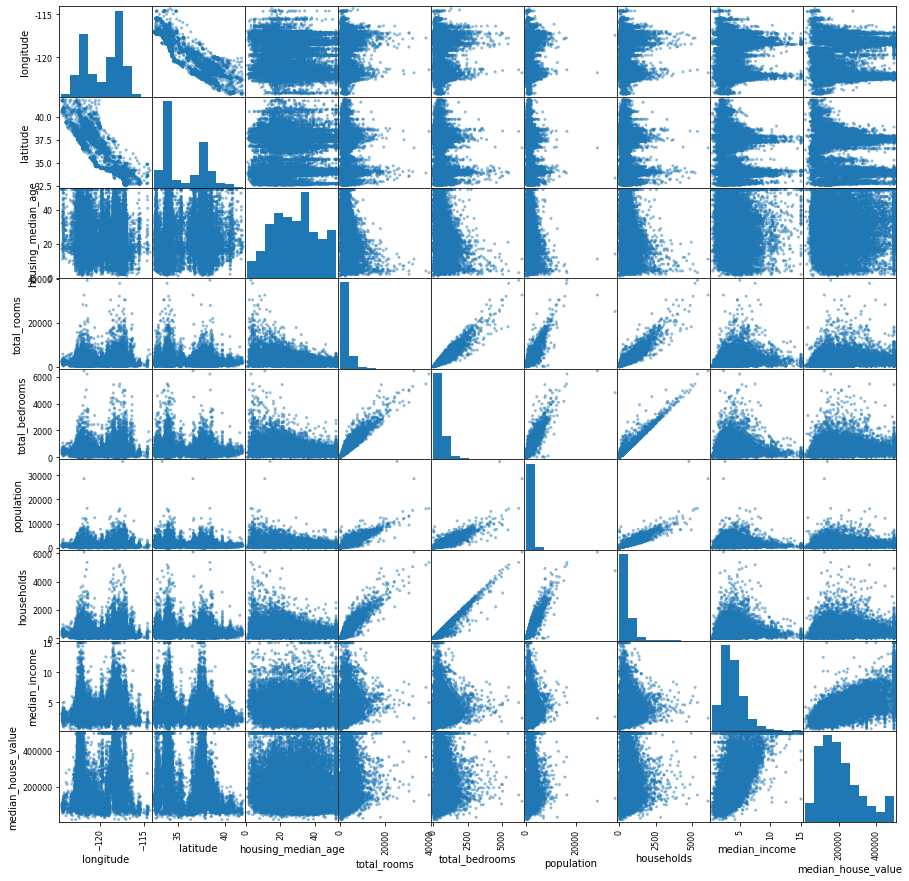

In [13]:
pd.plotting.scatter_matrix(data.iloc[:,:], figsize=(15, 15));
#double click to zoom in your interest area

This is a Correlation Matrix of our dataset.

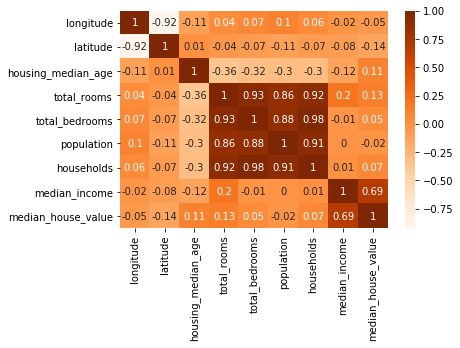

In [14]:
correlation_matrix = data.iloc[:,:].corr().round(2)

sns.heatmap(data=correlation_matrix, annot=True,cmap="Oranges")

The following sum of subplots tries to show us some interesting informations about important features that detemines the price of houses in California.

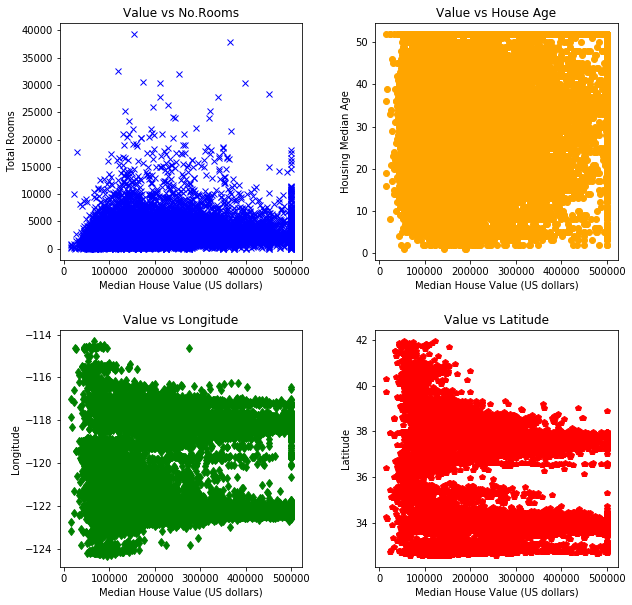

In [15]:
# chart size
plt.figure(figsize=(10,10))
    
# chart with 2Χ2 subplot
    
plt.subplot(2,2,1) # 1st(up left) 
plt.plot(data.median_house_value, data.total_rooms, ls ='', color='blue', marker='x')
plt.xlabel('Median House Value (US dollars)') # horizontal axis name
plt.ylabel('Total Rooms') # vertical axis name
plt.title('Value vs No.Rooms') # chart title
    
plt.subplot(2,2,2) # 2nd(up right) 
plt.plot(data.median_house_value, data.housing_median_age, ls ='', color='orange', marker='o')
plt.xlabel('Median House Value (US dollars)') # horizontal axis name
plt.ylabel('Housing Median Age') # vertical axis name
plt.title('Value vs House Age') # chart title

plt.subplot(2,2,3) # 3rd(down left)
plt.plot(data.median_house_value, data.longitude, ls ='', color='green', marker='d')
plt.xlabel('Median House Value (US dollars)') # horizontal axis name
plt.ylabel('Longitude')  # vertical axis name
plt.title('Value vs Longitude') # chart title

plt.subplot(2,2,4) # 4th(down right)
plt.plot(data.median_house_value, data.latitude, ls ='', color='red', marker='p')
plt.xlabel('Median House Value (US dollars)') # horizontal axis name
plt.ylabel('Latitude')   # vertical axis name
plt.title('Value vs Latitude') # chart title

plt.subplots_adjust(hspace=0.3, wspace=0.3) # empty space between subplots

# Splitting the dataset into training and testing data  🤖


In [25]:
#inputs
X = data[['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income']]

#output
y= data['median_house_value']

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=14)

#### 🆘 Important

- The **test_size** is generally expected to be around 20-30 % of  our dataset. By changing this number we can see diffent Succes Rates in our algorithms.After many combinations, we find that one of the bests is **"test_size=0.25**. You can try changing them to see new results for our following Evaluations Models.

- We set **random_state=14** in order to have the exact same results everytime we run it. You can experiment by changing the No. or even by removing it. The results for all the following algorithms will slightly change.

## Linear Regression ↗️

#### 1. Importing algorithm's library

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#### 2. Select a specific learning algorithm (Linear Regression)

In [28]:
linregressor = LinearRegression()

#### 3. Train our model

In [29]:
linregressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### ⛔ Opps!!! We have a problem... 🐛🐛🐛

As we can see, when we try trainning our model, we get the following ValueError:

"Input contains NaN, infinity or a value too large for dtype('float64')".

Let's start debugging!!!

In [21]:
# gets False
np.isnan(data.any())

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms        False
population            False
households            False
median_income         False
median_house_value    False
ocean_proximity       False
dtype: bool

In [22]:
# gets True
np.isfinite(data.all())

longitude             True
latitude              True
housing_median_age    True
total_rooms           True
total_bedrooms        True
population            True
households            True
median_income         True
median_house_value    True
ocean_proximity       True
dtype: bool

As we can see we have infinite values. That's the reason for our error. All we have to do now is to remove those values and replace them with new ones.  

In [23]:
data.replace([np.inf, -np.inf], np.nan, inplace=True)

In [24]:
data.fillna(999, inplace=True)

Now we can try running our model once again from the data splitting stage! 😄

#### 4. Model evaluation

In [30]:
from sklearn import metrics
y_pred_lr = linregressor.predict(X_test)

# mean absolute error
mae=metrics.mean_absolute_error(y_test, y_pred_lr)
# root mean square error of our model
rmse = (np.sqrt(mean_squared_error(y_test, y_pred_lr)))
# r-squared score of our model
r2 = r2_score(y_test, y_pred_lr)
linregressor.score(X_test, y_test)

print("Our model performance metrics are the following:")
print("--------------------------------------")
print('Mean Absolute Error= ', mae)  
print('Root Mean Squared Error = ',rmse)
print('R2 score = ',linregressor.score(X_test, y_test))

Our model performance metrics are the following:
--------------------------------------
Mean Absolute Error=  50442.22815707092
Root Mean Squared Error =  69050.11270050665
R2 score =  0.6353379613242294


#### 5. Graph real output - estimated output

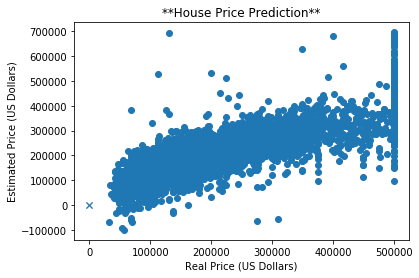

In [31]:
plt.scatter(y_test, y_pred_lr)

plt.plot([0, 50], [0, 50], '--x')

plt.title('**House Price Prediction**')
plt.xlabel('Real Price (US Dollars)')
plt.ylabel('Estimated Price (US Dollars)')
plt.show()

## 🇰- Nearest Neighbors Regression

#### 1. Importing algorithm's library

In [32]:
from sklearn.neighbors import KNeighborsRegressor

#### 2. Select a specific learning algorithm (K-Nearest Neighbors Regression) & set hyperparameters

In [33]:
knnReg = KNeighborsRegressor(n_neighbors=4)

#### 3. Train our model

In [34]:
knnReg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                    weights='uniform')

#### 4. Model evaluation

In [35]:
y_pred_kn = knnReg.predict(X_test)

In [36]:
from sklearn import metrics
y_pred_kn = knnReg.predict(X_test)

# mean absolute error
mae=metrics.mean_absolute_error(y_test, y_pred_kn)
# root mean square error of our model
rmse = (np.sqrt(mean_squared_error(y_test, y_pred_kn)))
# r-squared score of our model
r2 = r2_score(y_test, y_pred_kn)
knnReg.score(X_test, y_test)

print("Our model performance metrics are the following:")
print("--------------------------------------")
print('Mean Absolute Error= ', mae)  
print('Root Mean Squared Error = ',rmse)
print('R2 score = ',knnReg.score(X_test, y_test))

Our model performance metrics are the following:
--------------------------------------
Mean Absolute Error=  77585.88081395348
Root Mean Squared Error =  100519.52932522444
R2 score =  0.22720791588560085


#### 5. Changing the K value in order to find the best possible performance

In [37]:
knn_performance=[]

for k in range(1,65):
  knnClass = KNeighborsRegressor(n_neighbors=k)
  knnClass.fit(X_train, y_train)
  pred_knn = knnClass.predict(X_test)
  score = r2_score(y_test, pred_knn)
  knn_performance.append(score)
  print("No. K of Neighbors =",k, "    Success Rate: ",score)
print()
print("The best possible rate is ",max(knn_performance),"for Κ =",knn_performance.index(max(knn_performance))+1)

No. K of Neighbors = 1     Success Rate:  -0.23558989111972717
No. K of Neighbors = 2     Success Rate:  0.07923099953968893
No. K of Neighbors = 3     Success Rate:  0.17461576765728493
No. K of Neighbors = 4     Success Rate:  0.22720791588560085
No. K of Neighbors = 5     Success Rate:  0.2582148740208977
No. K of Neighbors = 6     Success Rate:  0.27264312217600406
No. K of Neighbors = 7     Success Rate:  0.28682482817644606
No. K of Neighbors = 8     Success Rate:  0.29440120691888405
No. K of Neighbors = 9     Success Rate:  0.29970696373052497
No. K of Neighbors = 10     Success Rate:  0.3071938440683304
No. K of Neighbors = 11     Success Rate:  0.3084044040399344
No. K of Neighbors = 12     Success Rate:  0.3125857165590119
No. K of Neighbors = 13     Success Rate:  0.3155215384315102
No. K of Neighbors = 14     Success Rate:  0.31754749512322555
No. K of Neighbors = 15     Success Rate:  0.32031534618938495
No. K of Neighbors = 16     Success Rate:  0.31954050453901506
No. K

## Random Forest Regression 🏞️

#### 1. Importing algorithm's library

In [38]:
from sklearn.ensemble import RandomForestRegressor

#### 2. Select a specific learning algorithm (Random Forest Regression) & set hyperparameters

In [39]:
rf = RandomForestRegressor(n_estimators=750,max_features = 7)

#### 3. Train our model

It will take some time to run

In [41]:
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=7, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=750, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

#### 4. Model evaluation

In [42]:
y_pred_test_rf = rf.predict(X_test)
y_pred_train_rf = rf.predict(X_train)

In [43]:
from sklearn import metrics
y_pred_test_rf = rf.predict(X_test)

# mean absolute error
mae=metrics.mean_absolute_error(y_test, y_pred_test_rf)
# root mean square error of our model
rmse = (np.sqrt(mean_squared_error(y_test, y_pred_test_rf)))
# r-squared score of our model
r2 = r2_score(y_test, y_pred_test_rf)
knnReg.score(X_test, y_test)

print("Our model performance metrics are the following:")
print("--------------------------------------")
print('Mean Absolute Error= ', mae)  
print('Root Mean Squared Error = ',rmse)
print('R2 score = ',rf.score(X_test, y_test))

Our model performance metrics are the following:
--------------------------------------
Mean Absolute Error=  31386.624152713175
Root Mean Squared Error =  48316.85898819844
R2 score =  0.8214502857846433


#### 🆘 Important

At the second step of our trainning **(2. Select a specific learning algorithm (Random Forest Regression) & set hyperparameters)**, when setting the hyperparameters we can change the no. of estimators & the maximum features to take in account in order to find the best possible Success Rate **(4. Model Evaluation)**. After many combinations, we find that one of the bests is **n_estimators=750,max_features = 7**. You can try changing them to see new results in our Model Evaluation.

#### 5. Feature Importance Visualization 

The following graph represents the features of our dataset based on their importance for the Random Forest Regression Algorithm.

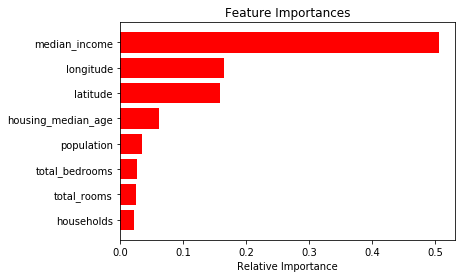

In [44]:
features = ['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income']
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#### 🆘 Important
We can observe that the "median_income" (follow-up period in days) is the most important feature of our dataset. On the other hand, the feature "households" is the least important.

## Conclusion 🏁

All the algorithms that we used are considered some of the most fundamentals. They are considered very powerful and easy to understand and use. In our case the best algorithm was **Random Forest Regression** with a success rate (R2 score) of **82.1%**. In contrary, the least effective algorithm for our case was the **K-Nearest Neighbors Regression** with a success rate of **32.4%** for **k=21**. In between,it was the **Linear Regression** with a success rate of about **63.5%**.


ML algorithms in combination with a good dataset can become a very powerful tool that can be used to solve certain problems. It is relatively a new science with many of its fundamentals based on older ones. Nowadays more and more people, companies and industries understand it's potential. The future for this science field is certainly bright!!! 
